In [392]:
from pandas.core.common import flatten
import matplotlib.pyplot as plt

In [393]:
liste_binaire1 = "11010001011"
liste_binaire2 = "00111010001"
liste_binaire3 = "10100110111010"
liste_binaire4 = "00111010001"
liste_binaire5 = "10001011101010"
liste_binaire6 = "10100010110"
liste_binaire7 = "1001111111001001001010110101011100"
bande_passante = 1 # la "moitié du temps bit" car inversement proportionnelle au temps bit qui "est de 8"
tension = 5

In [394]:
def rz_monopolaire_codage(liste_binaire, tension, multiple_bp):
    signal_code = []
    
    for i in liste_binaire:
        if i == '1':
            signal_code.extend([tension, 0])
        else:
            signal_code.extend([0, 0])
    
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def rz_monopolaire_decodage(signal_code, tension, multiple_db):
    liste_binaire = ""
    
    for i in range(0, len(signal_code), 2 * int(8 / multiple_db)):
        if signal_code[i] > 0:
            liste_binaire += '1'
        else:
            liste_binaire += '0'
    return liste_binaire

# Test de codage et décodage RZ monopolaire
signal_code1 = rz_monopolaire_codage(liste_binaire1, tension, bande_passante)
decoded_signal1 = rz_monopolaire_decodage(signal_code1, tension, bande_passante)

print("Liste binaire originale:", liste_binaire1)
print("Signal codé RZ monopolaire:", signal_code1)
print("Signal décodé RZ monopolaire:", decoded_signal1)

Liste binaire originale: 11010001011
Signal codé RZ monopolaire: [5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0]
Signal décodé RZ monopolaire: 11010001011


In [395]:
import numpy as np
import sys

def rz_bipolar_encoding(bitstring, voltage, multiple_bp):
    signal_code = []
    
    for bit in bitstring:
        if bit == '1':
            signal_code.extend([voltage, 0])
        else:
            signal_code.extend([-voltage, 0])
        
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def rz_bipolar_decoding(signal_code, voltage, multiple_bp):
    decoded_bits = ""
    
    for i in range(0, len(signal_code), 2 * int(8 / multiple_bp)):
        if signal_code[i] >= 0:
            decoded_bits += '1'
        else:
            decoded_bits += '0'
    return decoded_bits

# Example usage:
signal_code2 = rz_bipolar_encoding(liste_binaire1, tension, bande_passante)
decoded_signal2 = rz_bipolar_decoding(signal_code2, tension, bande_passante)

print("Original binary string:", liste_binaire1)
print("Signal codé RZ Bipolaire:", signal_code2)
print("Signal décodé RZ Bipolaire:", decoded_signal2)

Original binary string: 11010001011
Signal codé RZ Bipolaire: [5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, -5, -5, -5, -5, -5, -5, -5, -5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, -5, -5, -5, -5, -5, -5, -5, -5, 0, 0, 0, 0, 0, 0, 0, 0, -5, -5, -5, -5, -5, -5, -5, -5, 0, 0, 0, 0, 0, 0, 0, 0, -5, -5, -5, -5, -5, -5, -5, -5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, -5, -5, -5, -5, -5, -5, -5, -5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0]
Signal décodé RZ Bipolaire: 11010001011


In [396]:
def nrz_codage(liste_binaire, tension, multiple_bp):
    signal_code = []
    
    for i in liste_binaire:
        if i == '1':
            signal_code.extend([tension, tension])
        else:
            signal_code.extend([-tension, -tension])
    
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def nrz_decodage(signal_code, tension, multiple_bp):
    liste_binaire = ""
    
    for i in range(0, len(signal_code), 2 * int(8 / multiple_bp)):
        if signal_code[i] > 0:
            liste_binaire += '1'
        else:
            liste_binaire += '0'
    return liste_binaire

signal_code3 = nrz_codage(liste_binaire1, tension, bande_passante)
decoded_signal3 = nrz_decodage(signal_code3, tension, bande_passante)

print("Liste binaire originale:", liste_binaire1)
print("Signal codé NRZ:", signal_code3)
print("Signal décodé NRZ:", decoded_signal3)

Liste binaire originale: 11010001011
Signal codé NRZ: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Signal décodé NRZ: 11010001011


In [397]:
def nrzi_codage(data, tension, multiple_bp):
    signal_code = []
    
    if data[0] == '1':
      signal_code.extend([tension, tension])
    else:
      signal_code.extend([-tension, -tension])
    
    for bit in data[1:]:
        if bit == '0':
            if signal_code[-1] == -tension:
                signal_code.extend([tension, tension])
            else:
                signal_code.extend([-tension, -tension])
        else:
            signal_code.extend([signal_code[-1], signal_code[-1]])
    
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def nrzi_decodage(encoded_data, tension, multiple_bp):
    decoded_data = ""
    decoded_data += '1' if encoded_data[0] == tension else '0'
    
    for i in range(2, len(encoded_data), 2 * int(8 / multiple_bp)):
        if encoded_data[i] != encoded_data[i - 2]:
            decoded_data += '0'
        else:
            decoded_data += '1'
    
    return decoded_data

# Test de codage et décodage RZ monopolaire
signal_code4 = nrzi_codage(liste_binaire2, tension, bande_passante)
decoded_signal4 = nrzi_decodage(signal_code4, tension, bande_passante)

print("Liste binaire originale:", liste_binaire2)
print("Signal codé NRZI:", signal_code4)
print("Signal décodé NRZI:", decoded_signal4)

Liste binaire originale: 00111010001
Signal codé NRZI: [-5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Signal décodé NRZI: 011111111111


In [398]:
def manchester_codage(liste_binaire, tension, multiple_bp):
    signal_code = []
    
    for i in liste_binaire:
        if i == '1':
            signal_code.extend([tension, -tension])
        else:
            signal_code.extend([-tension, tension])
            
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def manchester_decodage(signal_code, tension, multiple_bp):
    liste_binaire = ""
    
    for i in range(0, len(signal_code), 2 * int(8 / multiple_bp)):
        if signal_code[i] > 0 and signal_code[i+1] < 0:
            liste_binaire += '1'
        elif signal_code[i] < 0 and signal_code[i+1] > 0:
            liste_binaire += '0'
        else:
            pass
    
    return liste_binaire

signal_code5 = manchester_codage(liste_binaire2, tension, bande_passante)
decoded_signal5 = manchester_decodage(signal_code5, tension, bande_passante)

print("Liste binaire originale:", liste_binaire2)
print("Signal codé manchester:", signal_code5)
print("Signal décodé manchester:", decoded_signal5)

Liste binaire originale: 00111010001
Signal codé manchester: [-5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5]
Signal décodé manchester: 


In [399]:
def manchester_differentiel_codage(data, tension, multiple_bp):
    signal_code = []
    
    if data[0] == '1':
      signal_code.extend([tension, -tension])
    else:
      signal_code.extend([-tension, tension])
    
    for bit in data[1:]:
        if bit == '1':
            signal_code.extend([-signal_code[-2], -signal_code[-1]])
        else:
            signal_code.extend([signal_code[-2], signal_code[-1]])
    
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def manchester_differentiel_decodage(encoded_data, tension, multiple_bp):
    decoded_data = ""
    decoded_data += '1' if encoded_data[0] == max(encoded_data) and encoded_data[1] == -max(encoded_data) else '1'
    
    for i in range(2, len(encoded_data), 2 * int(8 / multiple_bp)):
        if encoded_data[i] == encoded_data[i - 2]:
            decoded_data += '0'
        else:
            decoded_data += '1'
    
    return decoded_data

# Test de codage et décodage RZ monopolaire
signal_code6 = manchester_differentiel_codage(liste_binaire3, tension, bande_passante)
decoded_signal6 = manchester_differentiel_decodage(signal_code6, tension, bande_passante)

print("Liste binaire originale:", liste_binaire3)
print("Signal codé Manchester différentiel:", signal_code6)
print("Signal décodé Manchester différentiel:", decoded_signal6)

Liste binaire originale: 10100110111010
Signal codé Manchester différentiel: [5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5]
Signal décodé Manchester différentiel: 100000000000000


In [400]:
def miller_codage(data, tension, multiple_bp):
    signal_code = []
    
    if data[0] == '1':
      signal_code.extend([tension, tension])
    else:
      signal_code.extend([-tension, -tension])
    
    for i in range(1, len(data)):
        if data[i] == '0' and data[i - 1] != '0':
          signal_code.extend([signal_code[-1], signal_code[-1]])
        elif data[i] == '0' and data[i - 1] == '0':
          signal_code.extend([-signal_code[-1], -signal_code[-1]])
        else:
          signal_code.extend([signal_code[-1], -signal_code[-1]])
    
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def miller_decodage(encoded_data, tension, multiple_bp):
    decoded_data = ""
    decoded_data += '1' if encoded_data[0] == max(encoded_data) and encoded_data[1] == -max(encoded_data) else '0'
    
    for i in range(2, len(encoded_data), 2 * int(8 / multiple_bp)):
        if encoded_data[i] != encoded_data[i - 2] and encoded_data[i] == encoded_data[i + 1]:
            decoded_data += '0'
        elif encoded_data[i] != encoded_data[i + 1]:
            decoded_data += '1'
        else:
            decoded_data += '0'
    
    return decoded_data

# Test de codage et décodage RZ monopolaire
signal_code7 = miller_codage(liste_binaire4, tension, bande_passante)
decoded_signal7 = miller_decodage(signal_code7, tension, bande_passante)

print("Liste binaire originale:", liste_binaire4)
print("Signal codé Miller:", signal_code7)
print("Signal décodé Miller:", decoded_signal7)

Liste binaire originale: 00111010001
Signal codé Miller: [-5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5]
Signal décodé Miller: 000000000000


In [401]:
def cmi_codage(data, tension, multiple_bp):
    signal_code = []
    
    if data[0] == '1':
      signal_code.extend([-tension, tension])
    else:
      signal_code.extend([-tension, -tension])
    
    for i in range(1, len(data)):
        if data[i] == '0' and data[i - 1] != '0':
          signal_code.extend([signal_code[-1], signal_code[-1]])
        elif data[i] == '0' and data[i - 1] == '0':
          signal_code.extend([-signal_code[-1], -signal_code[-1]])
        else:
          signal_code.extend([-signal_code[-1], signal_code[-1]])
    
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def cmi_decodage(encoded_data, tension, multiple_bp):
    decoded_data = ""
    for i in range(0, len(encoded_data), 2 * int(8 / multiple_bp)):
        if encoded_data[i] != encoded_data[i - 2] and encoded_data[i] == encoded_data[i + 1]:
            decoded_data += '0'
        elif encoded_data[i] != encoded_data[i + 1]:
            decoded_data += '1'
        else:
            decoded_data += '0'
    
    return decoded_data

# Test de codage et décodage RZ monopolaire
signal_code8 = cmi_codage(liste_binaire5, tension, bande_passante)
decoded_signal8 = cmi_decodage(signal_code8, tension, bande_passante)

print("Liste binaire originale:", liste_binaire5)
print("Signal codé CMI:", signal_code8)
print("Signal décodé CMI:", decoded_signal8)

Liste binaire originale: 10001011101010
Signal codé CMI: [-5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Signal décodé CMI: 00000000000000


In [402]:
def derniere_valeur_non_zero(liste):
    # Parcourir la liste à partir de la fin
    for i in range(len(liste) - 1, -1, -1):
        if liste[i] != 0:
            return liste[i]
    # Si toutes les valeurs sont zéro, retourner None ou une valeur par défaut selon le cas
    return None  # ou une valeur par défaut

In [386]:
def ami_codage(data, tension, multiple_bp):
    signal_code = []
    
    if data[0] == '1':
      signal_code.extend([tension, tension])
    else:
      signal_code.extend([0, 0])
    
    for i in range(1, len(data)):
        j = derniere_valeur_non_zero(signal_code)
        if data[i] == '0':
          signal_code.extend([0, 0])
        elif j == tension:
          signal_code.extend([-tension, -tension])
        else:
          signal_code.extend([tension, tension])
    
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def ami_decodage(encoded_data, tension, multiple_bp):
    decoded_data = ""
    decoded_data += '1' if encoded_data[0] == max(encoded_data) and encoded_data[1] == -max(encoded_data) else '0'
    
    for i in range(2, len(encoded_data), 2 * int(8 / multiple_bp)):
      if encoded_data[i] == 0:
        decoded_data += '0'
      else:
        decoded_data += '1'
    
    return decoded_data

# Test de codage et décodage RZ monopolaire
signal_code9 = ami_codage(liste_binaire4, tension, bande_passante)
decoded_signal9 = ami_decodage(signal_code9, tension, bande_passante)

print("Liste binaire originale:", liste_binaire4)
print("Signal codé AMI:", signal_code9)
print("Signal décodé AMI:", decoded_signal9)

Liste binaire originale: 00111010001
Signal codé AMI: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Signal décodé AMI: 000111010001


In [387]:
def mlt3_codage(data, tension, multiple_bp):
    signal_code = []
    
    if data[0] == '1':
        signal_code.extend([tension, tension])
    else:
        signal_code.extend([0, 0])
    
    for bit in data[1:]:
        if bit == '1':
            if signal_code[-1] == tension or signal_code[-1] == -tension:
                signal_code.extend([0, 0])
            else:
                j = derniere_valeur_non_zero(signal_code)
                if j == -tension:
                    signal_code.extend([tension, tension])
                else:
                    signal_code.extend([-tension, -tension])
        else:
            # Si le bit est 0, restez sur le même niveau de tension
            signal_code.extend([signal_code[-1], signal_code[-1]])
            
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def mlt3_decodage(encoded_data, tension, multiple_bp):
    decoded_data = ""
    decoded_data += '1' if encoded_data[0] == max(encoded_data) else '0'
    
    for i in range(2, len(encoded_data), 2 * int(8 / multiple_bp)):
        if encoded_data[i] == encoded_data[i - 2]:
            decoded_data += '0'
        else:
            decoded_data += '1'
    
    return decoded_data

# Test de codage et décodage RZ monopolaire
signal_code10 = mlt3_codage(liste_binaire6, tension, bande_passante)
decoded_signal10 = mlt3_decodage(signal_code10, tension, bande_passante)

print("Liste binaire originale:", liste_binaire6)
print("Signal codé MLT3:", signal_code10)
print("Signal décodé MLT3:", decoded_signal10)

Liste binaire originale: 10100010110
Signal codé MLT3: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Signal décodé MLT3: 100000000000


In [388]:
def deuxBunQ_codage(liste_binaire, multiple_bp):
    signal_code = []
    
    for i in range(0, len(liste_binaire), 2):
        if liste_binaire[i:i+2] == '00':
            signal_code.extend([-3, -3])
        elif liste_binaire[i:i+2] == '01':
            signal_code.extend([-1, -1])
        elif liste_binaire[i:i+2] == '11':
            signal_code.extend([1, 1])
        else:
            signal_code.extend([3, 3])
            
    encoded_data = []
    item = []
    
    for j in signal_code:
        for _ in range(int(8 / multiple_bp)):
            item.append(j)
        encoded_data.append(item)
        item = []
        
    return list(flatten(encoded_data))

def deuxBunQ_decodage(signal_code, multiple_bp):
    liste_binaire = ""
    for i in range(0, len(signal_code), 2 * int(8 / multiple_bp)):
        if signal_code[i] == 3:
            liste_binaire += '10'
        elif signal_code[i] == -1:
            liste_binaire += '01'
        elif signal_code[i] == -3:
            liste_binaire += '00'
        else:
            liste_binaire += '11'
    return liste_binaire

# Test de codage et décodage RZ monopolaire
signal_code11 = deuxBunQ_codage(liste_binaire7, bande_passante)
decoded_signal11 = deuxBunQ_decodage(signal_code11, bande_passante)

print("Liste binaire originale:", liste_binaire7)
print("Signal codé 2B1Q:", signal_code11)
print("Signal décodé 2B1Q:", decoded_signal11)

Liste binaire originale: 1001111111001001001010110101011100
Signal codé 2B1Q: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -

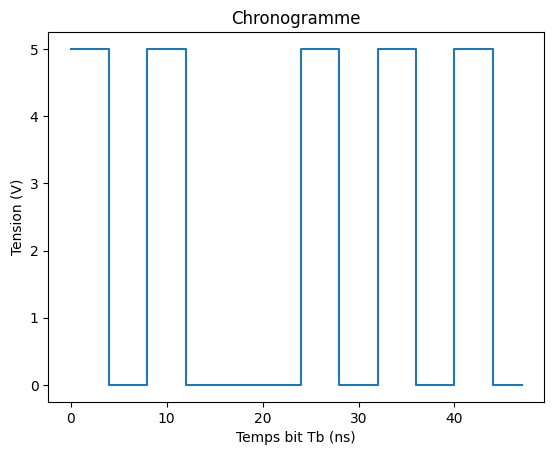

In [404]:
def plot_signal(y, title):
    x = range(len(y))
    x_values = []
    y_values = []
    prev_y = None
    for i in range(len(y)):
        if y[i] != prev_y:
            if prev_y is not None:
                x_values.append(x[i - 1])
                y_values.append(prev_y)
            x_values.append(x[i])
            y_values.append(prev_y)
        x_values.append(x[i])
        y_values.append(y[i])
        prev_y = y[i]

    x_values.append(x[-1])
    y_values.append(y[-1])

    plt.plot(x_values, y_values)
    plt.xlabel('Temps bit Tb (ns)')
    plt.ylabel('Tension (V)')
    plt.title(title)
    plt.show()


signal_code = [5, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 0]
signal_code = [5, 5, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 5, 5, 0]
plot_signal(signal_code, 'Chronogramme')


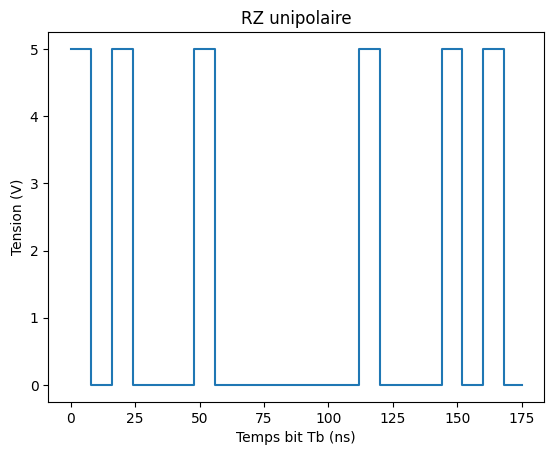

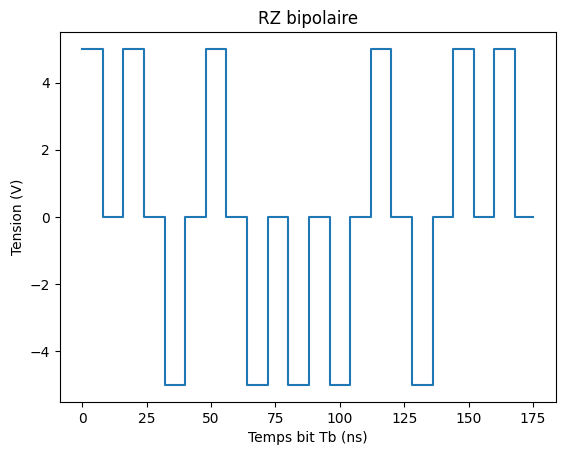

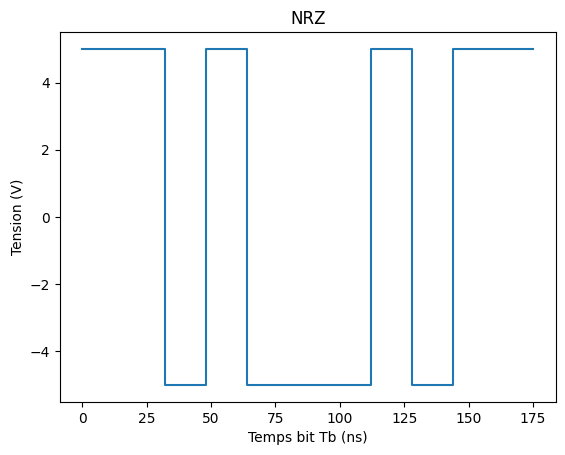

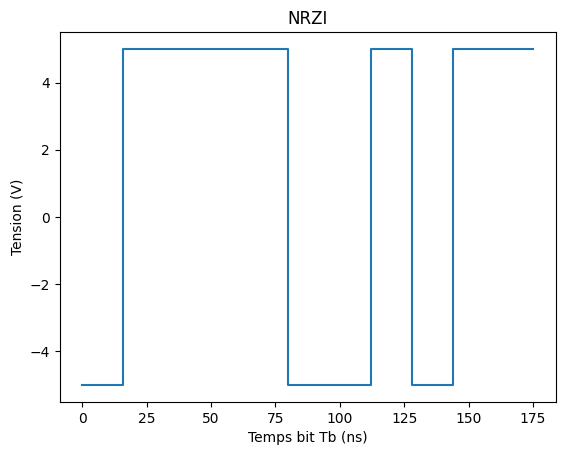

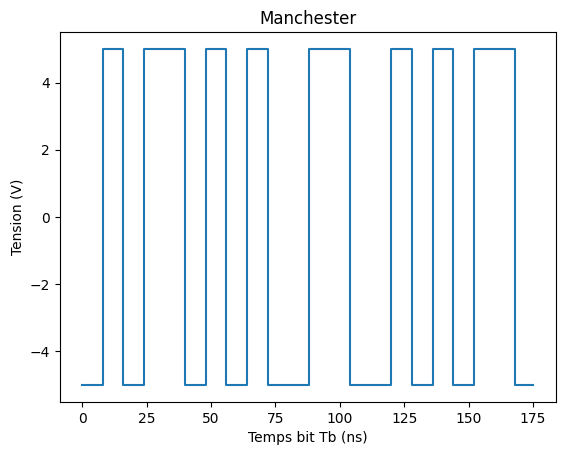

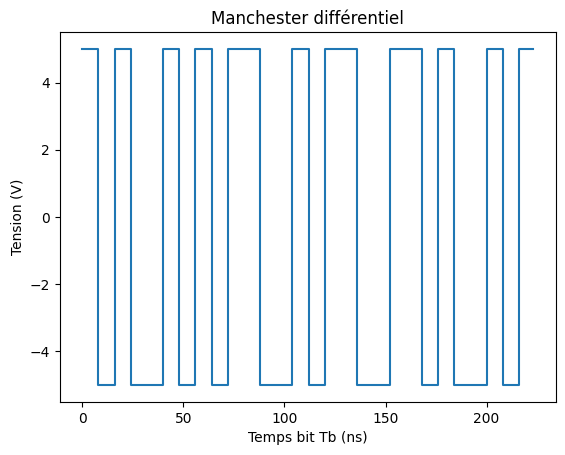

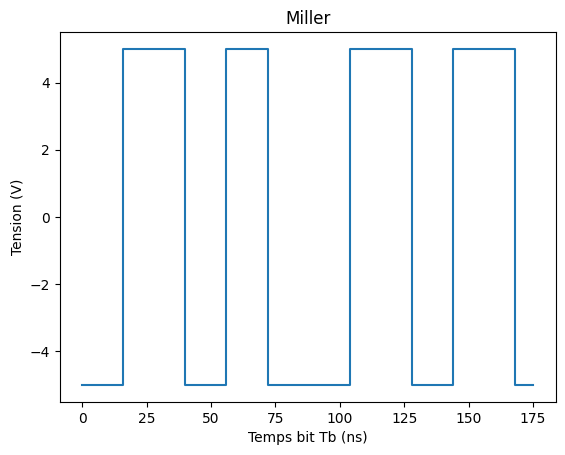

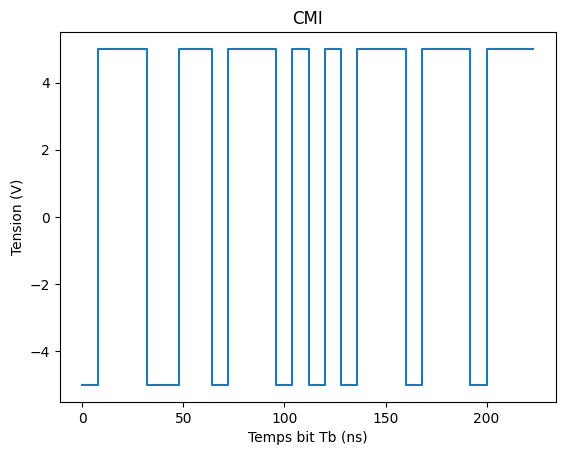

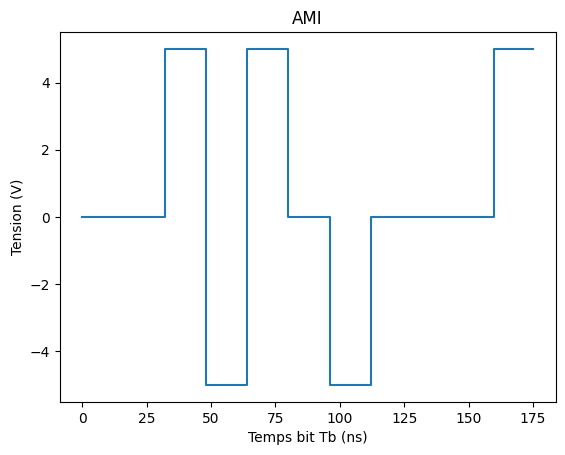

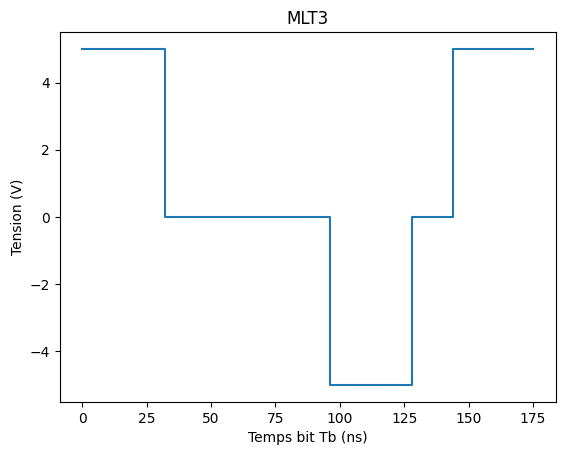

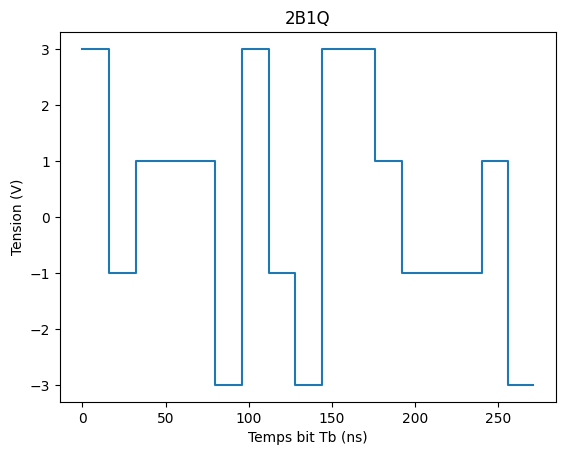

In [390]:
signal_codes = [signal_code1, signal_code2, signal_code3, signal_code4, signal_code5, signal_code6, signal_code7, signal_code8, signal_code9, signal_code10, signal_code11]
titre = ["RZ unipolaire", "RZ bipolaire", "NRZ", "NRZI", "Manchester", "Manchester différentiel", "Miller", "CMI", "AMI", "MLT3", "2B1Q"]

for i in range(len(signal_codes)):
    plot_signal(signal_codes[i], titre[i])

In [391]:
%history

import matplotlib.pyplot as plt
import numpy as np

def plot_with_lines(y_prime, title):
    '''
    y_prime = []
    
    for i in y:
        t = np.abs(i)
        for j in range(len(str(t))):
            if i >= 0:
                y_prime.append(int(str(t)[0]))
            else:
                y_prime.append(-int(str(t)[0]))
    y_second = []
    
    for i in y_prime:
        if i == 0:
            elt = len(str(max(y)))
            for i in range(elt):
                y_second.append(0)
        else:
            y_second.append(i)
    print(y_second)
    
    '''
    
    x = range(len(y_prime))
    x_values = []
    y_values = []
    prev_y = None
    sequence_length = 0
    
    for i in x:
        if y_prime[i] == prev_y:
            sequence_length += 1
        else:
            if prev_y is not None:
                for _ in range(sequence_length):
                    x_values.append(x[i - 1])
                    y_values.append(prev_y)
            sequence_length = 1
       